In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2 as cv

In [7]:
import urllib.request
import io

fd = urllib.request.urlopen("http://www.georeference.org/forum/e33442F3131323730312F6C696E652E706E67/line.png")
image_file = io.BytesIO(fd.read())
im = Image.open(image_file)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


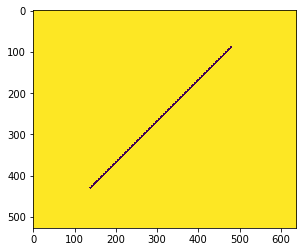

In [19]:
# Print off the line before it's equation has been calculated
plt.imshow(np.asarray(im))

In [88]:
# Convert to a bitmap
im = im.convert("1")
print(np.asarray(im))

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [45]:
req = urllib.request.urlopen('http://www.georeference.org/forum/e33442F3131323730312F6C696E652E706E67/line.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

img_cv = cv.imdecode(arr, -1)
print(img_cv.shape)
edges = cv.Canny(img_cv, 10, 100, False)
print(edges.shape)

(527, 638, 3)
(527, 638)


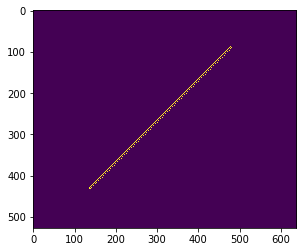

In [46]:
plt.imshow(edges)

In [68]:
#convert bitmap to list of datapoints
Y = np.array([])
X = np.array([])
for y in range(0, len(edges)):
    for x in range(0, len(edges[0])):
        if(edges[y, x] != 0):
            X = np.append(x, X)
            Y = np.append(y, Y)
print(X, Y)

[139. 138. 137. ... 479. 478. 477.] [431. 431. 431. ...  87.  87.  87.]


In [72]:
A = np.vstack([X, np.ones(len(X))]).T
A

array([[139.,   1.],
       [138.,   1.],
       [137.,   1.],
       ...,
       [479.,   1.],
       [478.,   1.],
       [477.,   1.]])

In [74]:
m, c = np.linalg.lstsq(A, Y)[0]
print(m, c)

-0.9995344258703586 567.3492210244439


/Users/maxomdal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


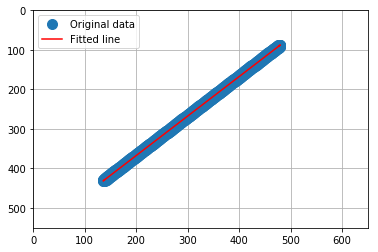

In [87]:
plt.plot(X, Y, 'o', label='Original data', markersize = 10)
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.legend()
plt.grid(True)
plt.ylim(550,0)
plt.xlim(0, 650)
plt.show()